# Radiating dipole example
This demonstrates a simple dipole radiating in free space. Although there is an assign_epsr!() call here, it sets $\epsilon_r = 1$ and therefore has no effect.

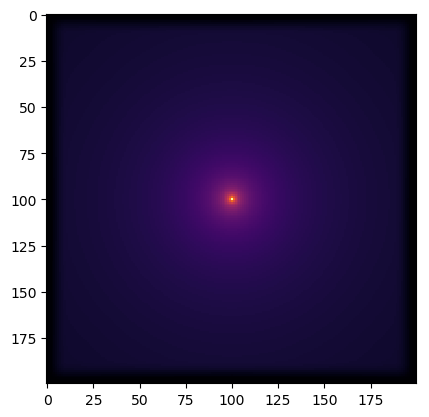

In [1]:
include("./fdfd.jl");
import PyPlot
using fdfd

omega = 2*pi*200e12
N = (200,200);
Npml = (15,15)
xrange = (-2.5e-6,2.5e-6);
yrange = (-2.5e-6,2.5e-6);
geom = Geometry(N, Npml, xrange, yrange);

region_func(x,y) = -0.25e-6<=x<=0.25e-6 && -0.1e-6<=y<=0.1e-6;
assign_epsr!(geom, region_func, 1);
assign_src_point!(geom, (0, 0));

(Ez, Hx, Hy) = solve_driven_TM(geom, omega);
PyPlot.imshow(abs.(Ez), cmap="inferno")
PyPlot.show()

# Photonic waveguide transition
This demonstrates an indirect photonic mode transition in a waveguide. The even mode is launched from the left and is converted to the odd mode as it propagates.

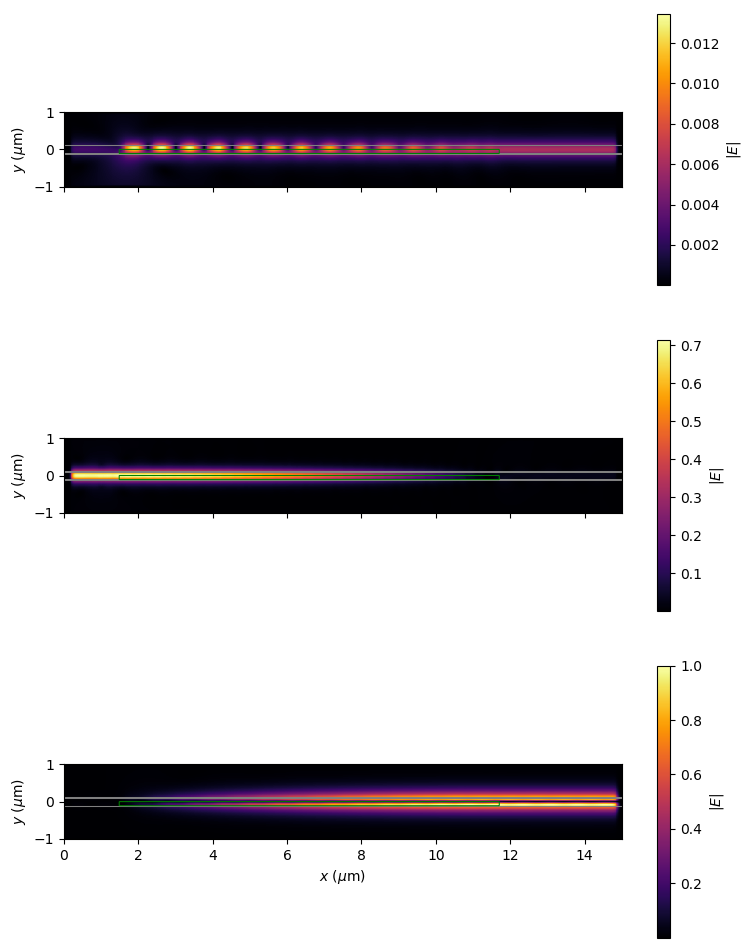

13.235973 seconds (38.95 k allocations: 1.650 GiB, 2.73% gc time)


In [2]:
omega0 = 2*pi*1.939e14;
Omega = 4.541e14;

Nsb = 1;
N = (600,200);
Npml = (15,10)
xrange = (0.0,15e-6);
yrange = (-1e-6,1e-6);
a = 0.2202e-6;
q = 2.9263e6;

geom = Geometry(N, Npml, xrange, yrange);
mod = Modulator(geom, Omega, Nsb);

region_wg(x,y) = -a/2<=y<=a/2;
region_modulation(x,y) = 1.5e-6<=x<=11.7e-6 && -a/2<=y<=0;
modulation_phase(x,y) = q*x;

assign_epsr!(mod.geom, region_wg, 12.25);
assign_mod_delta!(mod, region_modulation, 1);
assign_mod_phi_func!(mod, region_modulation, modulation_phase);
assign_src_mode!(mod.geom, "TM", omega0, omega0/fdfd.c0*3.5, [1e-6,0], "x", 61)

(Ez, Hx, Hy, omega) = solve_modulation_TM(mod, omega0);
plot_fields_abs(mod, Ez, cbar=true);